In [1]:
# netcdf/numpy/xray/stats
import xarray as xr

# plotting packages
import seaborn as sns
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

# turbulence package
import turbpy
import turbpy.multiConst as mc

import sys
sys.path.append("/home/elilouis/sublimationofsnow/")
import sosutils
from metpy.units import units
import metpy
import pint_xarray
import altair as alt
alt.data_transformers.enable('json')
alt.renderers.enable('svg')
import pytz

from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import datetime as dt

# Inputs

In [2]:
sos_download_dir='/data2/elilouis/sublimationofsnow/sosnoqc'
DATE_FORMAT_STR = '%Y%m%d'
# start_date = '20221101'; end_date = '20230312'
# start_date = '20221031'; end_date = '20221103'
start_date = '20230218'; end_date = '20230224'
# start_date = '20230129'; end_date = '20230204'
# start_date = '20230131'; end_date = '20230204'
# start_date = '20230204'; end_date = '20230208'
# start_date = '20230217'; end_date = '20230221'
# start_date = '20230310'; end_date = '20230314'
# start_date = '20230314'; end_date = '20230320'


datelist = pd.date_range(
    dt.datetime.strptime(start_date, '%Y%m%d'),
    dt.datetime.strptime(end_date, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

VARIABLE_NAMES = [
    # Sonic Anemometer Data for 4 towers
    'tc_1m_uw',     'spd_1m_uw',     'dir_1m_uw',     'u_1m_uw',   'v_1m_uw',   'w_1m_uw',   'u_u__1m_uw',    'v_v__1m_uw',    'w_w__1m_uw',    
        'u_w__1m_uw',    'v_w__1m_uw',  'u_tc__1m_uw',  'v_tc__1m_uw',   'u_h2o__1m_uw',  'v_h2o__1m_uw',   'w_tc__1m_uw',   'w_h2o__1m_uw',
    'tc_3m_uw',     'spd_3m_uw',     'dir_3m_uw',     'u_3m_uw',   'v_3m_uw',   'w_3m_uw',   'u_u__3m_uw',    'v_v__3m_uw',    'w_w__3m_uw',    
        'u_w__3m_uw',    'v_w__3m_uw',  'u_tc__3m_uw',  'v_tc__3m_uw',   'u_h2o__3m_uw',  'v_h2o__3m_uw',   'w_tc__3m_uw',   'w_h2o__3m_uw',
    'tc_10m_uw',    'spd_10m_uw',    'dir_10m_uw',    'u_10m_uw',  'v_10m_uw',  'w_10m_uw',  'u_u__10m_uw',   'v_v__10m_uw',   'w_w__10m_uw',   
        'u_w__10m_uw',   'v_w__10m_uw', 'u_tc__10m_uw', 'v_tc__10m_uw',  'u_h2o__10m_uw', 'v_h2o__10m_uw',  'w_tc__10m_uw',  'w_h2o__10m_uw',

    'tc_1m_ue',     'spd_1m_ue',     'dir_1m_ue',     'u_1m_ue',   'v_1m_ue',   'w_1m_ue',   'u_u__1m_ue',    'v_v__1m_ue',    'w_w__1m_ue',    
        'u_w__1m_ue',    'v_w__1m_ue',  'u_tc__1m_ue',  'v_tc__1m_ue',   'u_h2o__1m_ue',  'v_h2o__1m_ue',   'w_tc__1m_ue',   'w_h2o__1m_ue',
    'tc_3m_ue',     'spd_3m_ue',     'dir_3m_ue',     'u_3m_ue',   'v_3m_ue',   'w_3m_ue',   'u_u__3m_ue',    'v_v__3m_ue',    'w_w__3m_ue',    
        'u_w__3m_ue',    'v_w__3m_ue',  'u_tc__3m_ue',  'v_tc__3m_ue',   'u_h2o__3m_ue',  'v_h2o__3m_ue',   'w_tc__3m_ue',   'w_h2o__3m_ue',
    'tc_10m_ue',    'spd_10m_ue',    'dir_10m_ue',    'u_10m_ue',  'v_10m_ue',  'w_10m_ue',  'u_u__10m_ue',   'v_v__10m_ue',   'w_w__10m_ue',   
        'u_w__10m_ue',   'v_w__10m_ue', 'u_tc__10m_ue', 'v_tc__10m_ue',  'u_h2o__10m_ue', 'v_h2o__10m_ue',  'w_tc__10m_ue',  'w_h2o__10m_ue',

    'tc_1m_d',      'spd_1m_d',     'dir_1m_d',     'u_1m_d',   'v_1m_d',   'w_1m_d',   'u_u__1m_d',    'v_v__1m_d',    'w_w__1m_d',    
        'u_w__1m_d',    'v_w__1m_d',  'u_tc__1m_d',  'v_tc__1m_d',   'u_h2o__1m_d',  'v_h2o__1m_d',   'w_tc__1m_d',   'w_h2o__1m_d',
    'tc_3m_d',      'spd_3m_d',     'dir_3m_d',     'u_3m_d',   'v_3m_d',   'w_3m_d',   'u_u__3m_d',    'v_v__3m_d',    'w_w__3m_d',    
        'u_w__3m_d',    'v_w__3m_d',  'u_tc__3m_d',  'v_tc__3m_d',   'u_h2o__3m_d',  'v_h2o__3m_d',   'w_tc__3m_d',   'w_h2o__3m_d',
    'tc_10m_d',     'spd_10m_d',    'dir_10m_d',    'u_10m_d',  'v_10m_d',  'w_10m_d',  'u_u__10m_d',   'v_v__10m_d',   'w_w__10m_d',   
        'u_w__10m_d',   'v_w__10m_d', 'u_tc__10m_d', 'v_tc__10m_d',  'u_h2o__10m_d', 'v_h2o__10m_d',  'w_tc__10m_d',  'w_h2o__10m_d',

    'tc_2m_c',  'spd_2m_c',     'dir_2m_c',     'u_2m_c',   'v_2m_c',   'w_2m_c',   'u_u__2m_c',    'v_v__2m_c',    'w_w__2m_c',    
        'u_w__2m_c',    'v_w__2m_c',  'u_tc__2m_c',  'v_tc__2m_c',   'u_h2o__2m_c',  'v_h2o__2m_c',   'w_tc__2m_c',   'w_h2o__2m_c',
    'tc_3m_c',  'spd_3m_c',     'dir_3m_c',     'u_3m_c',   'v_3m_c',   'w_3m_c',   'u_u__3m_c',    'v_v__3m_c',    'w_w__3m_c',    
        'u_w__3m_c',    'v_w__3m_c',  'u_tc__3m_c',  'v_tc__3m_c',   'u_h2o__3m_c',  'v_h2o__3m_c',   'w_tc__3m_c',   'w_h2o__3m_c',
    'tc_5m_c',  'spd_5m_c',     'dir_5m_c',     'u_5m_c',   'v_5m_c',   'w_5m_c',   'u_u__5m_c',    'v_v__5m_c',    'w_w__5m_c',    
        'u_w__5m_c',    'v_w__5m_c',  'u_tc__5m_c',  'v_tc__5m_c',   'u_h2o__5m_c',  'v_h2o__5m_c',   'w_tc__5m_c',   'w_h2o__5m_c',
    'tc_10m_c', 'spd_10m_c',    'dir_10m_c',    'u_10m_c',  'v_10m_c',  'w_10m_c',  'u_u__10m_c',   'v_v__10m_c',   'w_w__10m_c',   
        'u_w__10m_c',   'v_w__10m_c', 'u_tc__10m_c', 'v_tc__10m_c',  'u_h2o__10m_c', 'v_h2o__10m_c',  'w_tc__10m_c',  'w_h2o__10m_c',
    'tc_15m_c', 'spd_15m_c',    'dir_15m_c',    'u_15m_c',  'v_15m_c',  'w_15m_c',  'u_u__15m_c',   'v_v__15m_c',   'w_w__15m_c',   
        'u_w__15m_c',   'v_w__15m_c', 'u_tc__15m_c', 'v_tc__15m_c',  'u_h2o__15m_c', 'v_h2o__15m_c',  'w_tc__15m_c',  'w_h2o__15m_c',
    'tc_20m_c', 'spd_20m_c',    'dir_20m_c',    'u_20m_c',  'v_20m_c',  'w_20m_c',  'u_u__20m_c',   'v_v__20m_c',   'w_w__20m_c',   
        'u_w__20m_c',   'v_w__20m_c', 'u_tc__20m_c', 'v_tc__20m_c',  'u_h2o__20m_c', 'v_h2o__20m_c',  'w_tc__20m_c',  'w_h2o__20m_c',

    
    # Temperature & Relative Humidity Array 
    'T_2m_c', 'T_3m_c', 'T_4m_c', 'T_5m_c', 'T_6m_c', 'T_7m_c', 'T_8m_c', 'T_9m_c', 'T_10m_c',
    'T_11m_c', 'T_12m_c', 'T_13m_c', 'T_14m_c', 'T_15m_c', 'T_16m_c', 'T_17m_c', 'T_18m_c', 'T_19m_c', 'T_20m_c',

    'RH_2m_c', 'RH_3m_c', 'RH_4m_c', 'RH_5m_c', 'RH_6m_c', 'RH_7m_c', 'RH_8m_c', 'RH_9m_c', 'RH_10m_c',
    'RH_11m_c','RH_12m_c','RH_13m_c','RH_14m_c','RH_15m_c','RH_16m_c','RH_17m_c','RH_18m_c','RH_19m_c','RH_20m_c',

    # Pressure Sensors
    'P_20m_c',
    'P_10m_c', 'P_10m_d', 'P_10m_uw', 'P_10m_ue',

    # Blowing snow/FlowCapt Sensors
    'SF_avg_1m_ue', 'SF_avg_2m_ue',

    # Apogee sensors
    "Vtherm_c", "Vtherm_d", "Vtherm_ue", "Vtherm_uw", 
    "Vpile_c", "Vpile_d", "Vpile_ue", "Vpile_uw",
    "IDir_c", "IDir_d", "IDir_ue", "IDir_uw",

    # Snow-level temperature arrays (towers D and UW)
    'Tsnow_0_4m_d', 'Tsnow_0_5m_d', 'Tsnow_0_6m_d', 'Tsnow_0_7m_d', 'Tsnow_0_8m_d', 'Tsnow_0_9m_d', 'Tsnow_1_0m_d', 'Tsnow_1_1m_d', 'Tsnow_1_2m_d', 'Tsnow_1_3m_d', 'Tsnow_1_4m_d', 'Tsnow_1_5m_d',
    'Tsnow_0_4m_uw', 'Tsnow_0_5m_uw', 'Tsnow_0_6m_uw', 'Tsnow_0_7m_uw', 'Tsnow_0_8m_uw', 'Tsnow_0_9m_uw', 'Tsnow_1_0m_uw', 'Tsnow_1_1m_uw', 'Tsnow_1_2m_uw', 'Tsnow_1_3m_uw', 'Tsnow_1_4m_uw', 'Tsnow_1_5m_uw',
    
    # Downward Facing Longwave Radiometer (tower D) - for measuring snow surface temperature
    'Rpile_out_9m_d',
    'Tcase_out_9m_d',
    
    # Upward facing shortwave radiometer (tower D) - for measuring incoming solar radiation!
    'Rsw_in_9m_d',
]

# Download SoS data

In [5]:
from urllib.error import URLError
# We make sure that we aren't accessing variables that don't exist in the datasets
# This is necessary because some daily NetCDF files don't have all the expected variables
# (for example because an instrument was down). In that case, we want to add that variable
# to the dataset, filled with nans, which sosutils.merge_datasets_with_different_variables
# handles for us
datasets = []
for date in datelist:
    try:
        ds = xr.open_dataset(sosutils.download_sos_data_day(date, sos_download_dir, cache=False, planar_fit=True))
    # Some dates are missing
    except URLError:
        print(f"failed on {date}, skipping")
    datasets.append(ds[set(ds.data_vars).intersection(VARIABLE_NAMES)])
sos_ds = sosutils.merge_datasets_with_different_variables(datasets, dim='time')

KeyboardInterrupt: 

# Calculate Potential Temperature, Surface Temperature, TKE

Add new calculated variables to the datase
From EOL (https://www.eol.ucar.edu/content/calculation-long-wave-radiation)
$$
R_{lw} = R_{pile} + SB * T_{case}^4
$$
And the steven-boltzman law
$$
T_{surface} = \Big( \frac {R_{lw}}{ \epsilon \sigma } \Big)^\frac{1}{4}
$$

In [4]:
# Potential Temperature
# iterate over pressure measurements
for i in range(2,21):
    height_adj_pressure = metpy.calc.add_height_to_pressure(
        sos_ds['P_10m_c'] * units.millibar, 
        i*units.m - (10*units.m)
    )
    sos_ds[f'Tpot_{i}m_c'] = metpy.calc.potential_temperature(    
        height_adj_pressure,
        sos_ds[f'T_{i}m_c'] * units.celsius
    ).pint.to(units.celsius)

# Surface Temperature
# calculate from apogees
sos_ds['Tsurf_c'] = (['time'],  sosutils.apogee2temp(sos_ds, 'c').values)
sos_ds['Tsurf_d'] = (['time'],  sosutils.apogee2temp(sos_ds, 'd').values)
sos_ds['Tsurf_ue'] = (['time'],  sosutils.apogee2temp(sos_ds, 'ue').values)
sos_ds['Tsurf_uw'] = (['time'],  sosutils.apogee2temp(sos_ds, 'uw').values)

SB = 5.67e-08 # steven boltzman constant, W/m^2/degK^4
SNOW_EMMISIVITY = 0.98
sos_ds['Tsurf_rad_d'] = ((sos_ds['Rpile_out_9m_d'] + SB * (sos_ds['Tcase_out_9m_d']+273.15)**4)/(SNOW_EMMISIVITY*SB))**(1/4) - 273.15

sos_ds['tke_2m_c'] = 0.5*(sos_ds['u_u__2m_c'] + sos_ds['v_v__2m_c'] + sos_ds['w_w__2m_c'])
sos_ds['tke_3m_c'] = 0.5*(sos_ds['u_u__3m_c'] + sos_ds['v_v__3m_c'] + sos_ds['w_w__3m_c'])
sos_ds['tke_5m_c'] = 0.5*(sos_ds['u_u__5m_c'] + sos_ds['v_v__5m_c'] + sos_ds['w_w__5m_c'])
sos_ds['tke_10m_c'] = 0.5*(sos_ds['u_u__10m_c'] + sos_ds['v_v__10m_c'] + sos_ds['w_w__10m_c'])
sos_ds['tke_15m_c'] = 0.5*(sos_ds['u_u__15m_c'] + sos_ds['v_v__15m_c'] + sos_ds['w_w__15m_c'])
sos_ds['tke_20m_c'] = 0.5*(sos_ds['u_u__20m_c'] + sos_ds['v_v__20m_c'] + sos_ds['w_w__20m_c'])

# sos_ds['tke_2m_uw'] = 0.5*(sos_ds['u_u__2m_uw'] + sos_ds['v_v__2m_uw'] + sos_ds['w_w__2m_uw'])
sos_ds['tke_3m_uw'] = 0.5*(sos_ds['u_u__3m_uw'] + sos_ds['v_v__3m_uw'] + sos_ds['w_w__3m_uw'])
sos_ds['tke_10m_uw'] = 0.5*(sos_ds['u_u__10m_uw'] + sos_ds['v_v__10m_uw'] + sos_ds['w_w__10m_uw'])

# sos_ds['tke_2m_ue'] = 0.5*(sos_ds['u_u__2m_ue'] + sos_ds['v_v__2m_ue'] + sos_ds['w_w__2m_ue'])
sos_ds['tke_3m_ue'] = 0.5*(sos_ds['u_u__3m_ue'] + sos_ds['v_v__3m_ue'] + sos_ds['w_w__3m_ue'])
sos_ds['tke_10m_ue'] = 0.5*(sos_ds['u_u__10m_ue'] + sos_ds['v_v__10m_ue'] + sos_ds['w_w__10m_ue'])

# sos_ds['tke_2m_d'] = 0.5*(sos_ds['u_u__2m_d'] + sos_ds['v_v__2m_d'] + sos_ds['w_w__2m_d'])
sos_ds['tke_3m_d'] = 0.5*(sos_ds['u_u__3m_d'] + sos_ds['v_v__3m_d'] + sos_ds['w_w__3m_d'])
sos_ds['tke_10m_d'] = 0.5*(sos_ds['u_u__10m_d'] + sos_ds['v_v__10m_d'] + sos_ds['w_w__10m_d'])

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/pint/facets/plain/quantity.py:1119: RuntimeWarning: divide by zero encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/pint/facets/plain/quantity.py:1332: RuntimeWarning: invalid value encountered in power
  self._convert_magnitude_not_inplace(self.UnitsContainer())
/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/elilouis/mambaforge/env

# Get Tidy Dataset

In [5]:
tidy_df = sosutils.get_tidy_dataset(sos_ds, list(sos_ds.data_vars))
tidy_df = sosutils.modify_df_timezone(tidy_df, pytz.UTC, pytz.timezone('US/Mountain'))

In [6]:
tidy_df[tidy_df.measurement.apply(lambda x: x is None)].variable.unique()

array(['Tcase_out_9m_d', 'Rpile_out_9m_d'], dtype=object)

# Calculate Ri and heat fluxes with turbpy

In [7]:
SNOW_DEPTH = 0.9
PRESSURE_HEIGHT = 10
stab_titles, stab_methods, stab_dict = sosutils.get_turbpy_schemes()

In [8]:
tidy_df_30Min = pd.DataFrame(
    tidy_df.set_index('time').groupby(
        ['measurement', 'variable', 'height',  'tower']
    )['value'].resample('30Min').mean()
).reset_index()

### HELP
Maybe its better to do these calculations with the original xarray dataset (like the calculations above). This would require that I explicitly declare all the variables used for modeled-flux calculations for each height/tower location which is probably better than the opaque things happening in sosutils.tidy_df_calculate_richardson_number_with_turbpy and sosutils.tidy_df_model_heat_fluxes_with_turbpy. Then I just need to come up with the new variable names and have those variable names parsed by the tidy_df functions.

In [10]:
for tower in ['c', 'uw', 'ue', 'd', ]:
    print(f"Calculating modeled fluxes for tower {tower}")
    height_list = [2,3,5,10,20] if tower == 'c' else [3,10]
    for height in height_list:
        print(f"for height {height}")
        print("calculating results")
        RiBulk = sosutils.tidy_df_calculate_richardson_number_with_turbpy(
            tidy_df_30Min,
            tower = tower,
            height = height,    
            snowDepth = SNOW_DEPTH,
            pressure_height = PRESSURE_HEIGHT
        )

        # run models and get results
        (
            stability_correction,
            conductance_sensible,
            conductance_latent,
            sensible_heat,
            latent_heat,
            zeta
        ) = sosutils.tidy_df_model_heat_fluxes_with_turbpy(
            tidy_df_30Min,
            stab_titles, 
            stab_methods,
            stab_dict,
            tower, 
            height, 
            SNOW_DEPTH,
            PRESSURE_HEIGHT
        )

        print("adding richardson number to dataset")
        # combine results into tidy_df and calculate:
        # richardson number
        tidy_df_30Min = sosutils.tidy_df_add_variable(
            tidy_df_30Min,
            RiBulk,
            f'Ri_{height}m_{tower}',
            'Richardson Number',
            height,
            tower
        )

        print("adding modeled fluxes to dataset")
        # heat fluxes and the following calculations:
        # *  vertical water vapor moisture flux (m/s * g/m^2) using the latent heat of sublimation
        # Note that we use the opposite convention of turbpy - latent and sensible heat fluxes should be positive upward
        # therefore there are negative signs below
        for stab in stab_titles:
            tidy_df_30Min = sosutils.tidy_df_add_variable(
                tidy_df_30Min,
                - latent_heat[stab],
                f'LH_modeled_{stab}_{height}m_{tower}',
                f'latent heat flux modeled {stab}',
                height,
                tower,
            )
            tidy_df_30Min = sosutils.tidy_df_add_variable(
                tidy_df_30Min,
                - latent_heat[stab]/(2838),
                f'w_h20_modeled_{stab}_{height}m_{tower}',
                f'w_h2o_ modeled {stab}',
                height,
                tower,
            )
            tidy_df_30Min = sosutils.tidy_df_add_variable(
                tidy_df_30Min,
                - latent_heat[stab]/(2838),
                f'SH_modeled_{stab}_{height}m_{tower}',
                f'sensible heat flux modeled {stab}',
                height,
                tower,
            )

Calculating modeled fluxes for tower c
for height 2
calculating results
adding richardson number to dataset
adding modeled fluxes to dataset
for height 3
calculating results
adding richardson number to dataset
adding modeled fluxes to dataset
for height 5
calculating results
adding richardson number to dataset
adding modeled fluxes to dataset
for height 10
calculating results
adding richardson number to dataset
adding modeled fluxes to dataset
for height 20
calculating results
adding richardson number to dataset
adding modeled fluxes to dataset
Calculating modeled fluxes for tower uw
for height 3
calculating results
adding richardson number to dataset
adding modeled fluxes to dataset
for height 10
calculating results
adding richardson number to dataset
adding modeled fluxes to dataset
Calculating modeled fluxes for tower ue
for height 3
calculating results
adding richardson number to dataset
adding modeled fluxes to dataset
for height 10
calculating results
adding richardson number to 

# Plot time series

In [11]:
temp_chart = alt.Chart().transform_filter(
    alt.FieldOneOfPredicate('variable', ['Tsurf_c', 'Tsurf_d', 'Tsurf_ue', 'Tsurf_uw', 'T_2m_c'])
).transform_window(
    rolling_mean = 'mean(value)',
    frame = [-6, 6],
    groupby = ['variable']
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("rolling_mean:Q", title='Temperature (˚C)'),
    alt.Color("variable:N")
).properties(width=800, height=200)

In [12]:
w_h2o_chart = alt.Chart().transform_filter(
    alt.FieldOneOfPredicate('tower', ['c'])
).transform_filter(
    alt.FieldOneOfPredicate('measurement', ['w_h2o_'])
).mark_line().transform_window(
    rolling_mean='median(value)',
    frame=[-10, 10],
    groupby=['variable']
).encode(
    alt.X('time:T'),
    alt.Y("rolling_mean:Q", 
    # scale=alt.Scale(domain=[-0.1, 0.1], clamp=True, nice=False), 
    title='Latent Heat Flux (g/m^2)'),
    alt.Color("height:O", scale=alt.Scale(scheme='viridis'))
).properties(width=800, height=200)

In [13]:
wind_speed_chart = alt.Chart().transform_filter(
    alt.FieldOneOfPredicate('variable', ['spd_2m_c', 'spd_3m_c'])
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q", title='Wind Speed (m/s)'),
    alt.Color("variable:N")
).properties(width=800, height=200)

In [14]:
richardson_chart = alt.Chart().transform_filter(
    alt.FieldOneOfPredicate('variable', ['Ri_2m_c', 'Ri_rad_2m_c'])
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q", title='Richardson Number'),
    alt.Color("variable:N")
).properties(width=800, height=200)

In [15]:
tke_chart = alt.Chart().transform_filter(
    alt.datum.variable == 'tke_2m_c'
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q", title='TKE', scale=alt.Scale(type='log')),
    alt.Color("variable:N")
).properties(width=800, height=200)

In [16]:
model_chart = alt.Chart().transform_filter(
    alt.datum.height == 2
).transform_filter(
    alt.FieldOneOfPredicate('measurement', [
        'w_h2o_', 
        'w_h2o_ modeled Standard',
        'w_h2o_ modeled MO (Holtslag/de Bruin)', 
    ])
).transform_window(
    rolling_mean='mean(value)',
    frame=[-6, 6],
    groupby=['measurement']
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("rolling_mean:Q", title='Latent Heat Flux (g/m^2)'),
    alt.Color("measurement:N")
).properties(width=800, height=150)

In [17]:
snow_flux_chart = alt.Chart().transform_filter(
    alt.FieldOneOfPredicate('measurement', ['snow flux'])
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q", title='Blowing Snow Flux (g/m^2)'),
    alt.Color("height:N")
).properties(width=800, height=200)

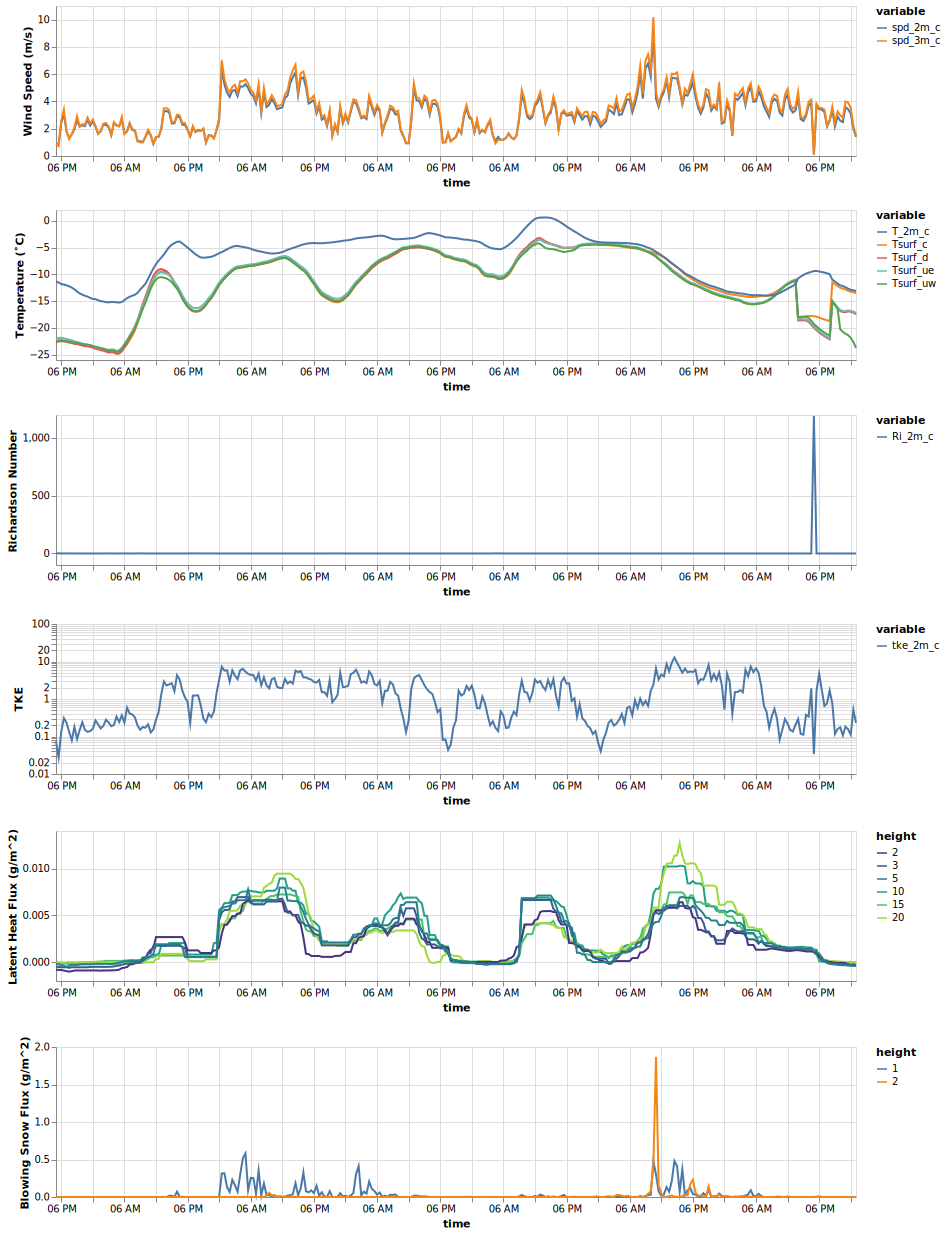

In [18]:
chart = alt.VConcatChart(
    data = tidy_df_30Min,
    vconcat = [
        wind_speed_chart.properties(height=150), 
        temp_chart.properties(height=150), 
        richardson_chart.properties(height=150), 
        tke_chart.properties(height=150), 
        w_h2o_chart.properties(height=150), 
        snow_flux_chart.properties(height=150)
    ]
).resolve_scale(color='independent', x='shared').configure_legend(
    labelLimit = 0
)

chart

# Compare surface temperature measurements

## Plot the snow temperature measurements to find closest in-snow measurement to surface

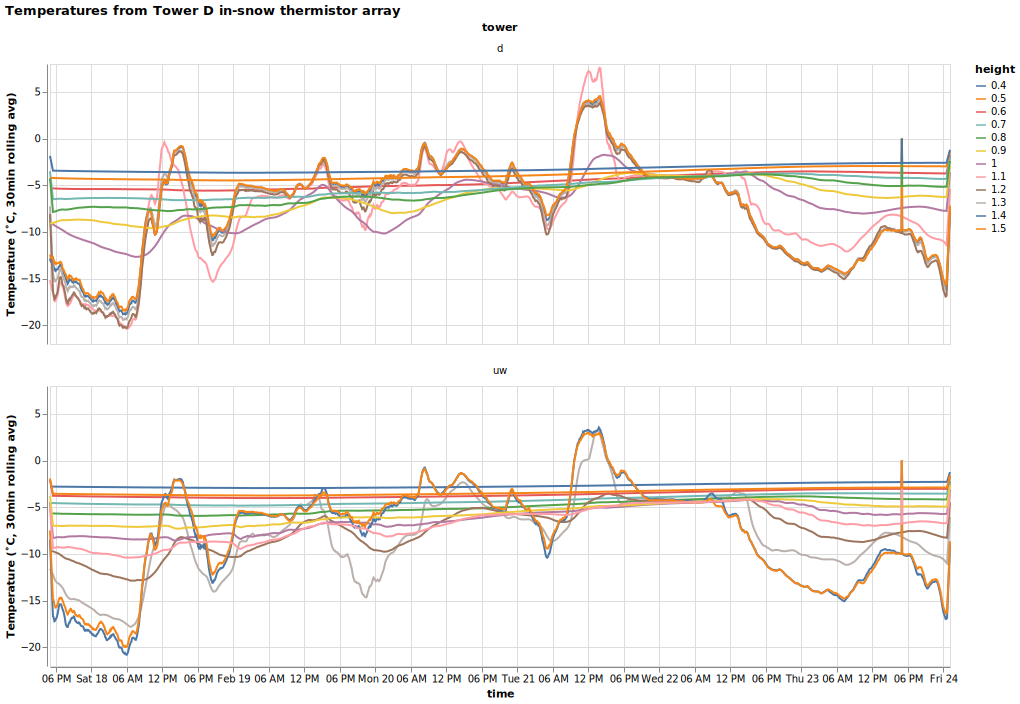

In [19]:
alt.Chart(tidy_df).transform_filter(
    alt.datum.measurement == 'snow temperature'
).transform_filter(
    # alt.datum.height > 0.7
    alt.datum.height > 0.0
).transform_window(
    rolling_mean='mean(value)',
    frame=[-6,6],
    groupby=['height']
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("rolling_mean:Q", title="Temperature (˚C, 30min rolling avg)"),
    alt.Color("height:N"),
    alt.Facet("tower:N", columns=1)
).properties(width=900, height=280, title='Temperatures from Tower D in-snow thermistor array')

Looks like the 1.1 thermistor is closest to the snow surface and the 1.2 thermistor is just above the snow surface.

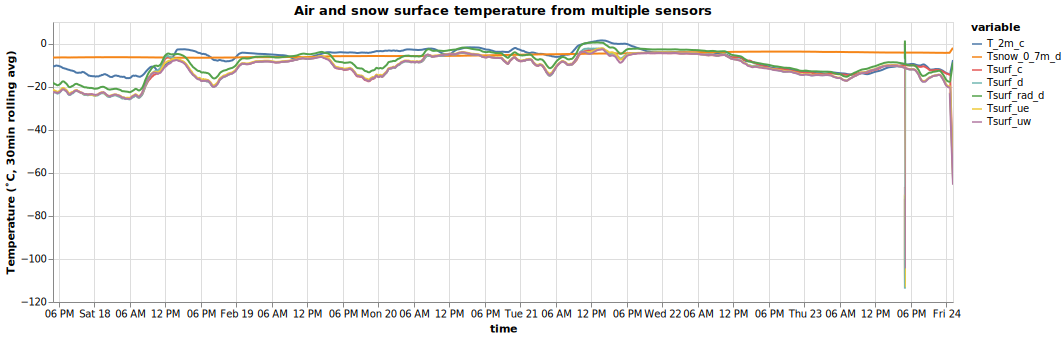

In [20]:
alt.Chart(tidy_df).transform_filter(
    alt.FieldOneOfPredicate('variable', ['Tsurf_c', 'Tsurf_d', 'Tsurf_ue', 'Tsurf_uw', 'Tsnow_0_7m_d', 'T_2m_c', 'Tsurf_rad_d'])
).transform_window(
    rolling_mean='mean(value)',
    frame=[-6,6],
    groupby=['variable']
).mark_line(interpolate='monotone').encode(
    alt.X('time:T'),
    alt.Y("rolling_mean:Q", title="Temperature (˚C, 30min rolling avg)"),
    alt.Color("variable:N"),
    # alt.Color("height:N"),
    # alt.StrokeDash("measurement:N")
).properties(width=900, height=280, title="Air and snow surface temperature from multiple sensors").interactive()

# Calc Ri and heat fluxes with turbpy using multiple surf. temp. measurements

In [21]:
# get turby schemes
stab_titles, stab_methods, stab_dict = sosutils.get_turbpy_schemes()

for surf_temp_col in ['Tsurf_c', 'Tsurf_d', 'Tsurf_ue', 'Tsurf_uw', 'Tsurf_rad_d']:
    
    RiBulk = sosutils.tidy_df_calculate_richardson_number_with_turbpy(
        tidy_df_30Min,
        tower = 'c',
        height = 2,    
        snowDepth = 1,
        pressure_height = 10,
        fillna_method = 'ffill',
        surface_temp_col_substitute = surf_temp_col
    )

    tidy_df_30Min = sosutils.tidy_df_add_variable(
        tidy_df_30Min,
        RiBulk,
        f'Ri_2m_c_{surf_temp_col}',
        f'Richardson Number using {surf_temp_col}',
        2,
        'c'
    )


    # run models and get results
    (
        stability_correction,
        conductance_sensible,
        conductance_latent,
        sensible_heat,
        latent_heat,
        zeta
    ) = sosutils.tidy_df_model_heat_fluxes_with_turbpy(
        tidy_df_30Min,
        stab_titles, 
        stab_methods,
        stab_dict,
        'c', 
        2, 
        1,
        10, 
        fillna_method='ffill',
        surface_temp_col_substitute = surf_temp_col
    )

    # heat fluxes and the following calculations:
    # *  vertical water vapor moisture flux (m/s * g/m^2) using the latent heat of sublimation
    # Note that we use the opposite convention of turbpy - latent and sensible heat fluxes should be positive upward
    # therefore there are negative signs below
    for stab in stab_titles:
        tidy_df_30Min = sosutils.tidy_df_add_variable(
            tidy_df_30Min,
            - latent_heat[stab],
            f'LH_modeled_{stab}_2m_c_{surf_temp_col}',
            f'latent heat flux modeled {stab} using {surf_temp_col}',
            2,
            'c'
        )
        tidy_df_30Min = sosutils.tidy_df_add_variable(
            tidy_df_30Min,
            - latent_heat[stab]/(2838),
            f'w_h20_modeled_{stab}_2m_c_{surf_temp_col}',
            f'w_h2o_ modeled {stab} using {surf_temp_col}',
            2,
            'c'
        )
        tidy_df_30Min = sosutils.tidy_df_add_variable(
            tidy_df_30Min,
            - latent_heat[stab]/(2838),
            f'SH_modeled_{stab}_2m_c_{surf_temp_col}',
            'sensible heat flux modeled {stab} using {surf_temp_col}',
            2,
            'c'
        )

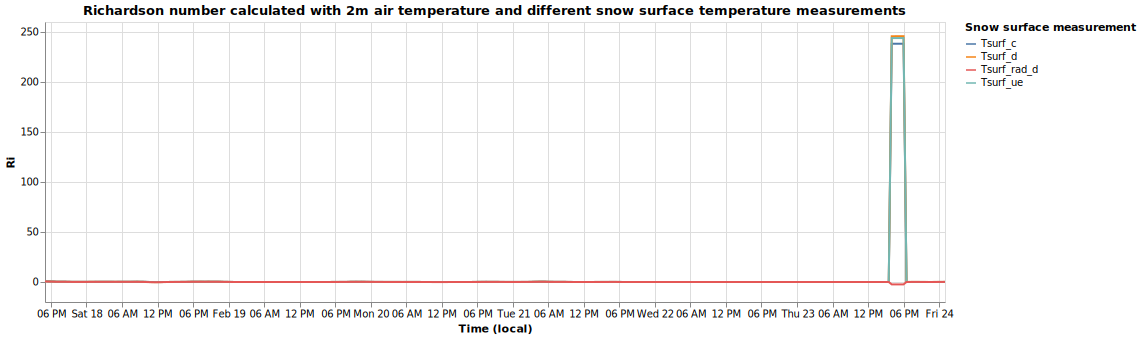

In [24]:
column_dict = {
    'Richardson Number using Tsurf_c': 'Tsurf_c',
    'Richardson Number using Tsurf_d': 'Tsurf_d',
    'Richardson Number using Tsurf_ue': 'Tsurf_ue',
    'Richardson Number using Tsurf_rad_d': 'Tsurf_rad_d',
}
src = tidy_df_30Min[tidy_df_30Min.measurement.isin(column_dict.keys())]
src['plot_name'] = src['measurement'].apply(column_dict.get)

snow_surface_plot = alt.Chart(src).transform_window(
    rolling_mean = 'mean(value)',
    frame=[-2, 2],
    groupby=['plot_name']
).mark_line().encode(
    alt.X("time:T", title='Time (local)'),
    alt.Y("rolling_mean:Q", title='Ri'),
    alt.Color("plot_name:N", title='Snow surface measurement')
).properties(width=900, height=280, title='Richardson number calculated with 2m air temperature and different snow surface temperature measurements')
snow_surface_plot

In [25]:
tidy_df_10Min = pd.DataFrame(
    tidy_df.set_index('time').groupby(
        ['measurement', 'variable', 'height', 'tower']
    )['value'].resample('10Min').median()
).reset_index()

WARN Conflicting  property "width" (1000 and 900). Using 1000.
WARN Conflicting  property "height" (300 and 280). Using 300.
WARN Infinite extent for field "time": [Infinity, -Infinity]
WARN Infinite extent for field "rolling_mean": [Infinity, -Infinity]


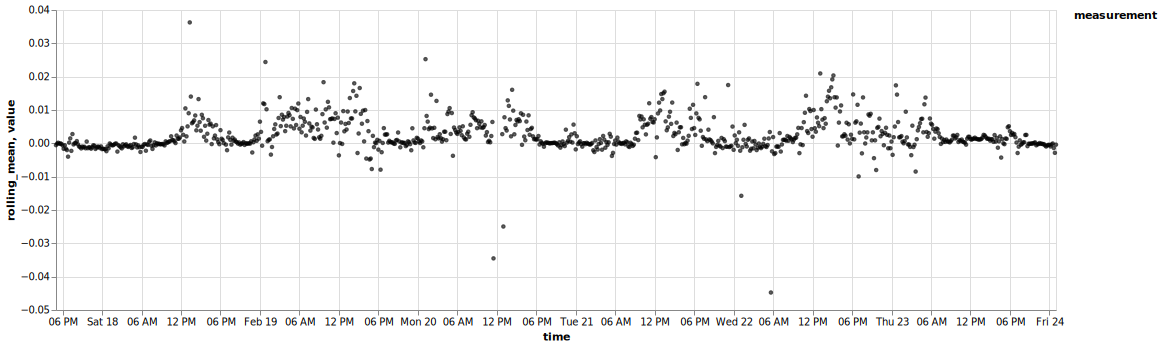

In [26]:
(alt.Chart(tidy_df).transform_filter(
    alt.FieldOneOfPredicate(
        'variable',
        [
            'w_h20_modeled_Standard_2m_c_Tsurf_c',
            'w_h20_modeled_Standard_2m_c_Tsurf_d',
            'w_h20_modeled_Standard_2m_c_Tsurf_ue',
            'w_h20_modeled_Standard_2m_c_Tsnow_0_7m_d',
            'w_h20_modeled_Standard_2m_c_Tsurf_rad_d',
        ]
    )
).transform_window(
    rolling_mean = 'mean(value)',
    frame=[-2, 2],
    groupby=['measurement']
).mark_line().encode(
    alt.X("time:T"),
    alt.Y("rolling_mean:Q"),
    alt.Color("measurement")
).properties(width=1000, height=300) + \
\
alt.Chart(tidy_df_10Min).transform_filter(
    alt.FieldOneOfPredicate('variable',['w_h2o__2m_c'])
).mark_point(color='black', size=6).encode(
    alt.X("time:T"),
    alt.Y("value:Q"),
).properties(width=900, height=280)).configure_legend(
    labelLimit = 0
)

In [ ]:
[f for f in tidy_df.variable.unique() if f.startswith('w_h20_')]

In [ ]:
model_df = tidy_df[tidy_df['variable'].isin([
    'w_h2o__2m_c',
    'w_h20_modeled_Standard_2m_c',
    'w_h20_modeled_MO (Holtslag/de Bruin)_2m_c',
    'Ri_2m_c'
])].pivot_table(index=['time', 'tower', 'height'], values='value', columns='variable').reset_index()

In [ ]:
model_df[['w_h2o__2m_c', 'w_h20_modeled_Standard_2m_c']]

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

sns.scatterplot(
    model_df,
    x='w_h2o__2m_c',
    y='w_h20_modeled_Standard_2m_c',
    # s=10,
    alpha=0.05,
    ax=axes[0]
)
r2 = r2_score(
    model_df.dropna()['w_h2o__2m_c'], 
    model_df.dropna()['w_h20_modeled_Standard_2m_c']
)
axes[0].set_title("R2: {:.2f}".format(r2))

sns.scatterplot(
    model_df,
    x='w_h2o__2m_c',
    y='w_h20_modeled_MO (Holtslag/de Bruin)_2m_c',
    # s=10,
    alpha=0.05,
    ax=axes[1]
)
r2 = r2_score(
    model_df.dropna()['w_h2o__2m_c'], 
    model_df.dropna()['w_h20_modeled_MO (Holtslag/de Bruin)_2m_c']
)
axes[1].set_title("R2: {:.2f}".format(r2))

# Compare TKE and temperature gradient

In [ ]:
tidy_df = sosutils.tidy_df_add_variable(
        tidy_df,
        tidy_df.query("variable == 'T_2m_c'").value.values - tidy_df.query("variable == 'Tsurf_rad_d'").value.values,
        f'temperature gradient',
        'temperature gradient',
        2,
        'c'
    )

In [ ]:
model_df = tidy_df[tidy_df['variable'].isin([
    'temperature gradient',
    'tke_2m_c',
    'spd_2m_c'
])].pivot_table(index=['time', 'tower', 'height'], values='value', columns='variable').reset_index()

In [ ]:
sns.scatterplot(model_df, x='spd_2m_c', y='tke_2m_c')

In [ ]:
sns.scatterplot(model_df, x='temperature gradient', y='tke_2m_c')

# At multiple heights and towers - Calculate Richardson number and modeled heat fluxes with turbpy and add new variables to our tidy df

In [ ]:
# get turby schemes

SNOW_DEPTH = 1
PRESSURE_HEIGHT = 10

for tower in ['c']:
    for height in [2,3,5,10,20]:

        stab_titles, stab_methods, stab_dict = sosutils.get_turbpy_schemes()

        RiBulk = sosutils.tidy_df_calculate_richardson_number_with_turbpy(
            tidy_df,
            tower = tower,
            height = height,    
            snowDepth = SNOW_DEPTH,
            pressure_height = PRESSURE_HEIGHT
        )

        # run models and get results
        (
            stability_correction,
            conductance_sensible,
            conductance_latent,
            sensible_heat,
            latent_heat,
            zeta
        ) = sosutils.tidy_df_model_heat_fluxes_with_turbpy(
            tidy_df,
            stab_titles, 
            stab_methods,
            stab_dict,
            tower, 
            height, 
            SNOW_DEPTH,
            PRESSURE_HEIGHT
        )

        # combine results into tidy_df and calculate:
        # richardson number
        tidy_df = sosutils.tidy_df_add_variable(
            tidy_df,
            RiBulk,
            f'Ri_{height}m_{tower}',
            'Richardson Number',
            height,
            tower
        )

        # heat fluxes and the following calculations:
        # *  vertical water vapor moisture flux (m/s * g/m^2) using the latent heat of sublimation
        # Note that we use the opposite convention of turbpy - latent and sensible heat fluxes should be positive upward
        # therefore there are negative signs below
        for stab in stab_titles:
            tidy_df = sosutils.tidy_df_add_variable(
                tidy_df,
                - latent_heat[stab],
                f'LH_modeled_{stab}_{height}m_{tower}',
                f'latent heat flux modeled {stab}',
                height,
                tower
            )
            tidy_df = sosutils.tidy_df_add_variable(
                tidy_df,
                - latent_heat[stab]/(2838),
                f'w_h20_modeled_{stab}_{height}m_{tower}',
                f'w_h2o_ modeled {stab}',
                height,
                tower
            )
            tidy_df = sosutils.tidy_df_add_variable(
                tidy_df,
                - latent_heat[stab]/(2838),
                f'SH_modeled_{stab}_{height}m_{tower}',
                'sensible heat flux modeled {stab}',
                height,
                tower
            )

In [ ]:
temp_chart = alt.Chart(tidy_df).transform_filter(
    alt.FieldOneOfPredicate('variable', ['Tsurf_c', 'T_2m_c', 'T_3m_c', 'T_5m_c', 'T_10m_c', 'T_20m_c'])
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q"),
    alt.Color("variable:N")
).properties(width=1200, height=150)

In [ ]:
w_h2o_chart = alt.Chart(tidy_df).transform_filter(
    alt.FieldOneOfPredicate('measurement', ['w_h2o_'])
).mark_line().transform_window(
    rolling_mean='mean(value)',
    frame=[-10, 10],
    groupby=['variable']
).encode(
    alt.X('time:T'),
    alt.Y("rolling_mean:Q", scale=alt.Scale(domain=[-0.1, 0.1], clamp=True, nice=False)),
    alt.Color("height:O", scale=alt.Scale(scheme='viridis'))
).properties(width=1200, height=150)

In [ ]:
wind_speed_chart = alt.Chart(tidy_df).transform_filter(
    alt.FieldOneOfPredicate('variable', ['spd_2m_c', 'spd_3m_c', 'spd_5m_c', 'spd_10m_c', 'spd_20m_c'])
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q"),
    alt.Color("variable:N")
).properties(width=1200, height=150)

In [ ]:
richardson_chart = alt.Chart(tidy_df).transform_filter(
    alt.FieldOneOfPredicate('variable', ['Ri_2m_c', 'Ri_3m_c', 'Ri_5m_c', 'Ri_10m_c', 'Ri_2m0_c'])
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q"),
    alt.Color("variable:N")
).properties(width=1200, height=150)

In [ ]:
model_chart = alt.Chart(tidy_df).transform_filter(
    alt.FieldOneOfPredicate('height', [2,3,5,10,20])
).transform_filter(
    alt.FieldOneOfPredicate('measurement', [
        'w_h2o_', 
        'w_h2o_ modeled Standard',
        'w_h2o_ modeled MO (Holtslag/de Bruin)', 
    ])
).transform_window(
    rolling_mean='mean(value)',
    frame=[-6, 6],
    groupby=['measurement']
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("rolling_mean:Q", ),
    alt.Color("measurement:N"),
    alt.Facet("height:O", columns=1)
).properties(width=1200, height=150).resolve_scale(y='independent')

In [ ]:
(wind_speed_chart & temp_chart & w_h2o_chart & richardson_chart & model_chart).resolve_scale(color='independent', x='shared')

In [ ]:
column_dict = {
    'w_h20_modeled_MO (Holtslag/de Bruin)_2m_c_Tsurf_c': 'Tsurf_c',
    'w_h20_modeled_MO (Holtslag/de Bruin)_2m_c_Tsurf_d': 'Tsurf_d',
    'w_h20_modeled_MO (Holtslag/de Bruin)_2m_c_Tsurf_ue': 'Tsurf_ue',
    'w_h20_modeled_MO (Holtslag/de Bruin)_2m_c_Tsnow_1_1m_d': 'Tsnow_1_1m_d',
    'w_h20_modeled_MO (Holtslag/de Bruin)_2m_c_Tsurf_rad_d': 'Tsurf_rad_d',
}
src = tidy_df[tidy_df.variable.isin(column_dict.keys())]
src['plot_name'] = src['variable'].apply(column_dict.get)


temp_plot & \
\
snow_surface_plot & \
\
alt.Chart(src).transform_window(
    rolling_mean = 'mean(value)',
    frame=[-2, 2],
    groupby=['measurement']
).mark_line().encode(
    alt.X("time:T"),
    alt.Y("rolling_mean:Q"),
    alt.Color("plot_name:N", title='Snow surface measurement')
).properties(width=900, height=280) + \
\
alt.Chart(tidy_df_10Min).transform_filter(
    alt.FieldOneOfPredicate('variable',['w_h2o__2m_c'])
).mark_point(color='black', size=6).encode(
    alt.X("time:T", title='Time (local)'),
    alt.Y("value:Q", title='Vertical moisture flux (g/m^2/s)'),
).properties(width=900, height=280, title='Estimates of vertical moisture flux using different snow surface measurements')
